In [1]:
%matplotlib inline
### Interactive medword testing tool ###

import medword_pipeline
import embedding_fasttext
import embedding_word2vec
import embedding_word2vec_composite
import shared.load_config 
import json
import pylab
import os
import model_validation as mv
import preprocess as pp


Using Theano backend.


In [2]:
### define a new configuration
config_dict = {
    
    # changes base data directory for developing on smaller data.
    # possible values: "develop" and "normal"
    "running_mode": "normal",
    
    # if you want to compute new training data from raw-data
    "compute_new_data": False,
    # note: if you don't compute new training data, you must provide them
    #       at train_data_src for training a new model
    
    # if you want to train a new model on training data
    "train_new_model": False,
    # note: if you don't train a new model, you must provide it
    #       at emb_model_src for the validation step
    
    # if you want to run the validation
    "run_validation": False,
    
    # chose embedding method. possible values: "word2vec" and "fasttext"
    "embedding_method": "word2vec-composite",
    
    # chose embedding algorithm. possible values: "skipgram" and "cbow"
    "embedding_algorithm": "skipgram",
    
    # chose filenames for train data and embedding model
    "train_data_filename": "train.txt",
    "embedding_model_filename": "emb_model_ft.bin",
    
    # base data dir when running in "normal" mode
    "base_data_dir": "data/",
    
    # base data dir when running in "develop" mode
    "develop_base_data_dir": "dev_data/",
    
    # embedding model settings
    "embedding_vector_dim": 150,
    "min_token_appearance": 5,
    
    # chose tokenizer. possible values: "nst" and "sgt"
    ## NonStemmingTokenizer: 'nst'
    # - no stemming, only remove punctuation marks
    # - lowercase letters

    ## SimpleGermanTokenizer: 'sgt'
    # - remove punctuation marks
    # - stemming
    # - lowercase letters
    "tokenizer": "nst",
    
    # validation data settings
    "val_data_dir": "data/validation_data/",
    "doesntfit_file": "german_doesntfit1.txt",
    "synonyms_file": "german_synonyms_phrases.txt",
    
    # where to store the configuration file
    "config_path": "configuration-ipython.json"
}

In [3]:
### save config file (don't change)
config_src = config_dict["config_path"]

with open(config_src, 'w+') as f:
    json.dump(config_dict, f, indent=4)
    
# load config object based on config file (don't change)
config = shared.load_config.Configuration(config_src)

In [4]:
### initialize embedding object (don't change)
if config.config['embedding_method'] == 'fasttext':
    embedding = embedding_fasttext.EmbeddingFasttext(config)

elif config.config['embedding_method'] == 'word2vec':
    embedding = embedding_word2vec.EmbeddingWord2vec(config)

elif config.config['embedding_method'] == 'word2vec-composite':
    embedding = embedding_word2vec_composite.EmbeddingWord2vecComposite(config)
    

else:
    print('embedding_algorithm (in config) must be "fasttext" or "word2vec"')


In [5]:
### run pipeline for that embedding (create train data, train model, validate model)
medword_pipeline.run_pipeline(embedding)

[nltk_data] Downloading package punkt to /home/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Running in NORMAL mode.


In [5]:
### Play with embedding model ###
#
# The following parts are intended to get familiar with the 
# model and the data

# check if model is instantiatet
if embedding._model is None: 
    print("Train or load a model.")
else: 
    print("Model is present.")

Train or load a model.


In [6]:
# maybe load model (if not created in training or loaded in validation of pipeline)
# Note: The model must fit the embedding method (fasttext or word2vec)!
emb_model_dir = 'data/embeddings/'
emb_model_filename = 'emb_model_ft.bin'

embedding.load_model(emb_model_dir, emb_model_filename)
print("Model loaded.")

Model loaded.


In [7]:
### Get model information ###
print("vocab size:", len(embedding.get_vocab()))
print("vector dim:", embedding.vec_dim())

vocab size: 361798
vector dim: 150


In [21]:
### Play with model ###

# define a word from which you like to see it's n-nearest neighbours 
# in the embedding space
word = 'ceteco sandoz'
n_nearest_neighbours = 10

# check if word is in model vocab
print("word is in model vocab: ", word in embedding.get_vocab())

# create list of neighbours
embedding.most_similar_n(word, n_nearest_neighbours)


word is in model vocab:  False
cet
eco
sandoz


[('langt', 0.8550068976483358),
 ('roetzer', 0.8442715031884811),
 ('droesser', 0.8438368622149449),
 ('schonfrist', 0.8408969563123138),
 ('film101', 0.8362701290420604),
 ('zeitmagazin', 0.8358793212009645),
 ('19972006', 0.8352904899210074),
 ('weltprint', 0.8341318972235378),
 ('zeitungsleser', 0.8325057911194269),
 ('rauterberg', 0.8301941100222336)]

In [21]:
### Analogy

# embedding.analogy([positives], [negatives], topn)
embedding.analogy(['entzuendung', 'frau'], [], 10)

[('bartholinitis', 0.5540084583295412),
 ('pelveoperitonitis', 0.5516970501114253),
 ('n739', 0.5441945208683527),
 ('eileiter', 0.5397869951330914),
 ('adnexitis', 0.5350158147085161),
 ('beckenadhaesion', 0.53321237220386),
 ('genitalprolaps', 0.5329878388691829),
 ('fournier-gangraen', 0.5301762943086812),
 ('endometritis', 0.5289991945594156),
 ('epididymitis', 0.527432929956771)]

In [11]:
# Get a vector of a word
import numpy as np
vec = embedding.word_vec('blinddarmentzuendung')
vec[:10]



array([-0.05576208,  0.07286525, -0.11488426,  0.06763246,  0.01310543,
       -0.00972985, -0.01771902, -0.12122954,  0.20332509,  0.02934829])

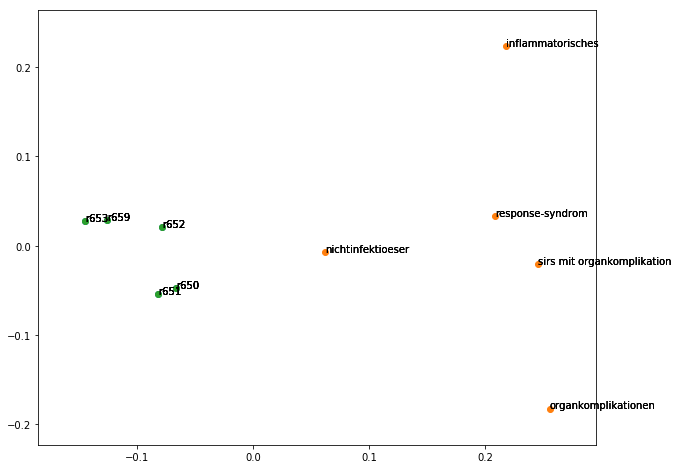

In [20]:
### Visualization ###
# From a list of words, plot all words and it's neighbours 

# define the words you would like to visualize
word_list = ['r651', 'sirs mit organkomplikation', 'r650']

# define the number of closest neighbors to display per word
n_nearest_neighbours = 4

# change figure size if desired
width = 10.0
height = 8.0
pylab.rcParams['figure.figsize'] = (width, height)

# plotting
mv.visualize_words(embedding, word_list, n_nearest_neighbours)

In [13]:
### test a tokenizer for the prepocessing and validation ###

## NonStemmingTokenizer: 'nst'
# - no stemming, only remove punctuation marks
# - lowercase letters
config.config['tokenizer'] = 'nst'

## SimpleGermanTokenizer: 'sgt'
# - remove punctuation marks
# - stemming
# - lowercase letters
# config.config['tokenizer'] = 'sgt'

# test the chosen tokenizer
tokenizer = pp.get_tokenizer(config)
example = "sternotomie 35h111"
             
tk_example = tokenizer.tokenize(str(example))

print(tk_example)

['sternotomie', '35h111']
